In [16]:
import pandas as pd
%matplotlib inline

Taking data from https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2005 to reproduce https://www.nytimes.com/interactive/projects/cp/summer-of-science-2015/latest/how-often-is-bmi-misleading.

Files came as `xpt` so had to use [xport](https://pypi.python.org/pypi/xport/) to convert from SAS format to CSV.

```
pip3 install xport
python -m xport dxx_d.xpt > dxx_d.csv
python -m xport DEMO_D.XPT > DEMO_D.csv
python -m xport BMX_D.XPT > BMX_D.csv
```

# DXX Body Fat Data

https://wwwn.cdc.gov/nchs/nhanes/2005-2006/DXX_D.htm

In [37]:
df = pd.read_csv("dxx_d.csv")
df.head()

,SEQN,_MULT_,DXAEXSTS,DXITOTST,DXITOTBN,DXIHE,DXXHEA,DXAHEBV,DXXHEBMC,DXXHEBMD,...,DXDSTTOT,DXDSTPF,DXDTOA,DXDTOBMC,DXDTOBMD,DXDTOFAT,DXDTOLE,DXDTOLI,DXDTOTOT,DXDTOPF
0,31128.0,1.0,1.0,0.0,0.0,0.0,196.86,0.0,294.37,1.495,...,36830.5,22.8,1526.87,1487.02,0.974,9252.1,29624.6,31111.6,40363.7,22.9
1,31128.0,2.0,1.0,0.0,0.0,0.0,196.86,0.0,294.37,1.495,...,36830.5,22.8,1526.87,1487.02,0.974,9252.1,29624.6,31111.6,40363.7,22.9
2,31128.0,3.0,1.0,0.0,0.0,0.0,196.86,0.0,294.37,1.495,...,36830.5,22.8,1526.87,1487.02,0.974,9252.1,29624.6,31111.6,40363.7,22.9
3,31128.0,4.0,1.0,0.0,0.0,0.0,196.86,0.0,294.37,1.495,...,36830.5,22.8,1526.87,1487.02,0.974,9252.1,29624.6,31111.6,40363.7,22.9
4,31128.0,5.0,1.0,0.0,0.0,0.0,196.86,0.0,294.37,1.495,...,36830.5,22.8,1526.87,1487.02,0.974,9252.1,29624.6,31111.6,40363.7,22.9


In [38]:
df.shape

(34465, 107)

### Need to filter out the `_MULT_` that isn't `1` according to [the documentation](https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/BMX_D.htm) (kind of). It isn't the right thing to do, but aren't being scientists at this very moment.

In [39]:
fat_pct = df[df._MULT_ == 1].set_index('SEQN')['DXDTOPF']
fat_pct.head()

SEQN
31128.0    22.9
31129.0    30.0
31131.0    41.9
31133.0    16.0
31137.0    41.3
Name: DXDTOPF, dtype: float64

# Demographic Data

https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/DEMO_D.htm

In [40]:
df = pd.read_csv("DEMO_D.csv")
df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,DMQMILIT,...,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANG,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA
0,31127.0,4.0,2.0,2.0,1.0,0.0,11.0,12.0,3.0,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,6434.950248,6571.396373,2.0,44.0
1,31128.0,4.0,2.0,1.0,2.0,11.0,132.0,132.0,4.0,NaN,...,2.0,2.0,1.0,2.0,2.0,1.0,9081.700761,8987.041810,1.0,52.0
2,31129.0,4.0,2.0,2.0,1.0,15.0,189.0,190.0,4.0,NaN,...,2.0,2.0,1.0,2.0,2.0,1.0,5316.895215,5586.719481,1.0,51.0
3,31130.0,4.0,2.0,2.0,2.0,85.0,NaN,NaN,3.0,2.0,...,2.0,2.0,NaN,NaN,NaN,NaN,29960.839509,34030.994786,2.0,46.0
4,31131.0,4.0,2.0,2.0,2.0,44.0,535.0,536.0,4.0,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,26457.708180,26770.584605,1.0,48.0


### Let's just grab the gender.

In [42]:
gender = df.set_index('SEQN')['RIAGENDR']
gender.head()

SEQN
31127.0    1.0
31128.0    2.0
31129.0    1.0
31130.0    2.0
31131.0    2.0
Name: RIAGENDR, dtype: float64

# Examination Data

https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/BMX_D.htm

In [62]:
df = pd.read_csv("BMX_D.csv")
df.head()

,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,...,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXTHICR,BMITHICR,BMXTRI,BMITRI,BMXSUB,BMISUB
0,31127.0,1.0,10.2,NaN,73.6,NaN,NaN,NaN,NaN,NaN,...,15.5,NaN,NaN,NaN,NaN,NaN,12.8,NaN,10.0,NaN
1,31128.0,1.0,40.1,NaN,NaN,NaN,NaN,NaN,151.6,NaN,...,21.7,NaN,62.8,NaN,39.5,NaN,10.4,NaN,8.4,NaN
2,31129.0,1.0,74.6,NaN,NaN,NaN,NaN,NaN,167.7,NaN,...,32.6,NaN,97.8,NaN,55.9,NaN,18.8,NaN,17.6,NaN
3,31130.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31131.0,3.0,75.2,NaN,NaN,NaN,NaN,NaN,156.0,NaN,...,35.8,NaN,96.0,NaN,53.7,NaN,NaN,2.0,NaN,1.0


In [64]:
bmi = df.set_index('SEQN')['BMXBMI']
bmi.head()

SEQN
31127.0      NaN
31128.0    17.45
31129.0    26.53
31130.0      NaN
31131.0    30.90
Name: BMXBMI, dtype: float64

# Combine

In [84]:
df = pd.DataFrame({'gender': gender, 'fat_pct': fat_pct, 'bmi': bmi})
df.gender.replace({1.0: 'Male', 2.0: 'Female'}, inplace=True)
df.head()

,bmi,fat_pct,gender
SEQN,,,
31127.0,NaN,NaN,Male
31128.0,17.45,22.9,Female
31129.0,26.53,30.0,Male
31130.0,NaN,NaN,Female
31131.0,30.90,41.9,Female


In [85]:
cleaned = df.dropna()
cleaned.head()

,bmi,fat_pct,gender
SEQN,,,
31128.0,17.45,22.9,Female
31129.0,26.53,30.0,Male
31131.0,30.90,41.9,Female
31133.0,16.79,16.0,Female
31137.0,27.78,41.3,Female


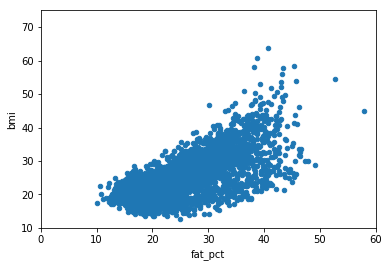

In [87]:
cleaned[cleaned.gender == 'Male'].plot(x='fat_pct', y='bmi', kind='scatter', xlim=(0, 60), ylim=(10, 75))

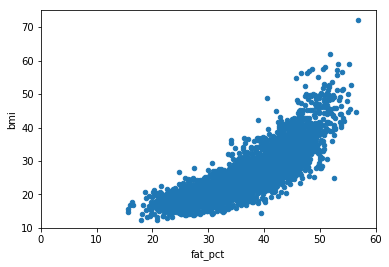

In [88]:
cleaned[cleaned.gender == 'Female'].plot(x='fat_pct', y='bmi', kind='scatter', xlim=(0, 60), ylim=(10, 75))

In [89]:
cleaned.gender.value_counts()

Male      3272
Female    3180
Name: gender, dtype: int64

In [91]:
cleaned.sample(2000).to_csv("bmi_fat.csv", index=False)